# 0. Project: UCI Cardiology Prediction

Dataset Source: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

# For Colabotatory

In [ ]:
# Run this as step0
!pip uninstall pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
# Define directories 
base_dir = '/content/drive/My Drive/staging_area/HD/space/processed.cleveland.csv'

# For Jupyter

In [1]:
base_dir ="./data/processed.cleveland.csv"

# 1.Packages and data extraction

In [49]:
# Importing necessary libraries
import sklearn as sk
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import metrics 


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix



from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



In [3]:
def data_extraction(file):

    dframe = pd.read_csv(file)

    dframe = dframe[dframe.age < 99.]

    print ("Dimensions: ", dframe.shape)
    print("Summary: %s" %dframe.describe())
    print("Show basic types as :  %s" %dframe.dtypes )

    return dframe

In [4]:
all_data = data_extraction(base_dir)

Dimensions:  (303, 14)
Summary:               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294 

# 2.Data preprocessing

In [6]:
# DATA_PREPOSSESSING
# There are logic errors in raw data, after removing the missing values, we got 297 subjects
# 1. there are some logic errors in the data, for ca and thal, there are some typos, so I change them with NAN
# 2. for "ca", there are 4 missing values, for "thal ", there are 2 missing values
# 3. for "Thal" , it has value 3-6-7, since it is a  qualitative value, there is a transfer here:
#  3 = normal; 6 = fixed defect; 7 = reversable defect to 0 = normal; 1 = fixed defect; 2 = reversable defect
# for target, transfer all 0s to 0 and all non-0 to 1

 
def data_pre(df0):

  dframe = df0.copy()
  dframe = dframe[dframe.ca != "?"]
  dframe = dframe[dframe.thal != "?"]
  print ("Dimensions: ", dframe.shape)

  dframe['ca']= dframe['ca'].astype('int')
  dframe['thal']= dframe['thal'].astype('int')
  # print("Show basic types as :  %s" %dframe.dtypes )

#   # data transfer:
#   dframe.loc[(dframe['thal'] == 7) ,'thal'] = 2
#   dframe.loc[(dframe['thal'] == 6) ,'thal'] = 1
#   dframe.loc[(dframe['thal'] == 3) ,'thal'] = 0
  # target transfer:
  dframe.loc[(dframe['target'] == 0) ,'target'] = 0
  dframe.loc[(dframe['target'] != 0) ,'target'] = 1


  # check NAN
  # dframe.isnull().sum()
  return dframe

In [7]:
processed_data = data_pre(all_data)

Dimensions:  (297, 14)


In [8]:
processed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [9]:
processed_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
processed_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int32
thal          int32
target        int64
dtype: object

# 5.normalization 

In [35]:
def data_norm(df0):
    dframe = df0.copy()
    
  # # step 2. logic error(delete rows)
  # print("#"*30)
  # dframeB = data_pre2(dframe)
  # print(dframeB.head())


  # step 2. Normalizes the numeric values that are not binary
    dframe['age'] = preprocessing.scale(dframe['age'])
    dframe['sex'] = preprocessing.scale(dframe['sex'])
    dframe['cp'] = preprocessing.scale(dframe['cp'])
    dframe['trestbps'] = preprocessing.scale(dframe['trestbps'])
    dframe['chol'] = preprocessing.scale(dframe['chol'])
    dframe['fbs'] = preprocessing.scale(dframe['fbs'])
    dframe['restecg'] = preprocessing.scale(dframe['restecg'])
    dframe['thalach'] = preprocessing.scale(dframe['thalach'])
    dframe['exang'] = preprocessing.scale(dframe['exang'])
    dframe['oldpeak'] = preprocessing.scale(dframe['oldpeak'])
    dframe['slope'] = preprocessing.scale(dframe['slope'])
    dframe['ca'] = preprocessing.scale(dframe['ca'])
    dframe['thal'] = preprocessing.scale(dframe['thal'])
    
    return dframe

In [36]:
norm_data = data_norm(processed_data)

In [38]:
norm_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,1
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0


# 6.Feature Selection
<br>
from sklearn.feature_selection import SelectKBest<br>
from sklearn.feature_selection import chi2<br>
from sklearn.feature_selection import f_classif<br>
from sklearn.feature_selection import mutual_info_classif<br>
from sklearn.feature_selection import SelectFpr<br>
from sklearn.feature_selection import SelectFdr<br>

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/


In [67]:
# Feature selection chi2

data = norm_data.copy()
X = data.iloc[:,0:13]  
y = data.iloc[:,-1] 

## 01.f_classif
ANOVA F-value between label/feature for classification tasks.

In [71]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [72]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score',ascending=False)  #print  best features

,Specs,Score
12,thal,113.219319
11,ca,80.577866
9,oldpeak,64.677208
7,thalach,64.589855
8,exang,63.680253
2,cp,59.241915
10,slope,36.804300
1,sex,24.798347
0,age,16.038097
6,restecg,8.394987


In [70]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score',ascending=False)  #print  best features

,Specs,Score
12,thal,113.219319
11,ca,80.577866
9,oldpeak,64.677208
7,thalach,64.589855
8,exang,63.680253
2,cp,59.241915
10,slope,36.804300
1,sex,24.798347
0,age,16.038097
6,restecg,8.394987


## 02.mutual_info_classif
Mutual information for a continuous target.

In [42]:
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score',ascending=False)  #print  best features

,Specs,Score
11,ca,0.160970
12,thal,0.144569
2,cp,0.114122
10,slope,0.106575
9,oldpeak,0.085527
4,chol,0.084942
1,sex,0.073838
7,thalach,0.057119
8,exang,0.048769
5,fbs,0.037935


## 03.Warpper- forward-selection

In [50]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [51]:
forward_selection(X,y)

<ipython-input-50-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-50-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-50-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-50-d9aa104cd376>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['thal', 'ca', 'exang', 'thalach', 'cp', 'oldpeak', 'sex']

## 04.Warpper- backward-selection

In [53]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [54]:
backward_elimination(X,y)

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# 05.Model using selection-L1-based feature selection

In [60]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
# X, y = load_iris(return_X_y=True)
# X.shape
# # (150, 4)
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# X_new.shape
# # (150, 3)

In [61]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

ValueError: Unknown label type: 'continuous'

# 6.modeling

In [12]:
df00 = processed_data

In [11]:
def x_y(df0):
    dframe = df0.copy()
    X = dframe.drop(['target'], axis=1)
    y = np.asarray(dframe['target'])
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

    return X, y

In [13]:
df0,y = x_y(df00)

# 99.warehouse

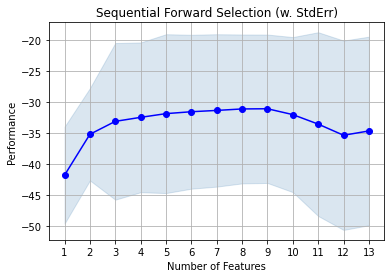

In [59]:
import mlxtend
import pandas as pd
# import pymrmr
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()